In [19]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [20]:
import numpy as np 
import pandas as pd
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/home/shuang/Downloads/bqair-2b59936a9500.json"

# Big query helpers
from google.cloud import bigquery
from bq_helper import BigQueryHelper

# Import plotting libaries
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.io as pio
import geopandas
import shapely

# the Plotly in offline mode we can see map in the notebook.
from plotly.offline import download_plotlyjs,init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)

In [21]:
#getting CO daily summary data first:
QUERY = """
    SELECT
        state_code,
        county_code,
        date_local,
        arithmetic_mean,
        aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.co_daily_summary`
    WHERE
      poc = 1
      AND EXTRACT(YEAR FROM date_local) in (2011,2012,2013,2014,2015,2016)
    
        """

In [22]:
bq_assistant = BigQueryHelper("bigquery-public-data", "epa_historical_air_quality")

In [23]:
df_co = bq_assistant.query_to_pandas(QUERY) # getting data through big query to pandas

In [24]:
df_co.head()

,state_code,county_code,date_local,arithmetic_mean,aqi
0,02,020,2011-03-08,1.320833,19
1,31,055,2016-10-27,0.983333,14
2,02,020,2011-03-07,0.829167,15
3,49,047,2012-01-22,1.337500,16
4,02,020,2011-03-12,1.137500,16


In [25]:
df_co['date_local'] = pd.to_datetime(df_co['date_local'])
df_co['year'] = df_co['date_local'].dt.year
df_co['month'] = df_co['date_local'].dt.month
import calendar
df_co['month_name'] = df_co['month'].apply(lambda x: calendar.month_abbr[x])
df_co.head()

,state_code,county_code,date_local,arithmetic_mean,aqi,year,month,month_name
0,02,020,2011-03-08,1.320833,19,2011,3,Mar
1,31,055,2016-10-27,0.983333,14,2016,10,Oct
2,02,020,2011-03-07,0.829167,15,2011,3,Mar
3,49,047,2012-01-22,1.337500,16,2012,1,Jan
4,02,020,2011-03-12,1.137500,16,2011,3,Mar


Text(0.5, 0, 'year')

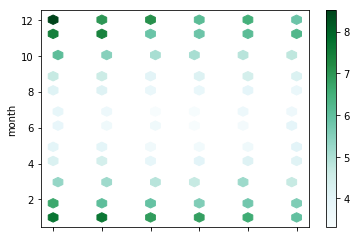

In [60]:
df_co.plot.hexbin(x='year', y='month', C = 'aqi', gridsize=25)
#this figure need to be adjust , not very impressive






In [17]:
df_co.set_index('date_local', inplace = True)

KeyError: 'date_local'

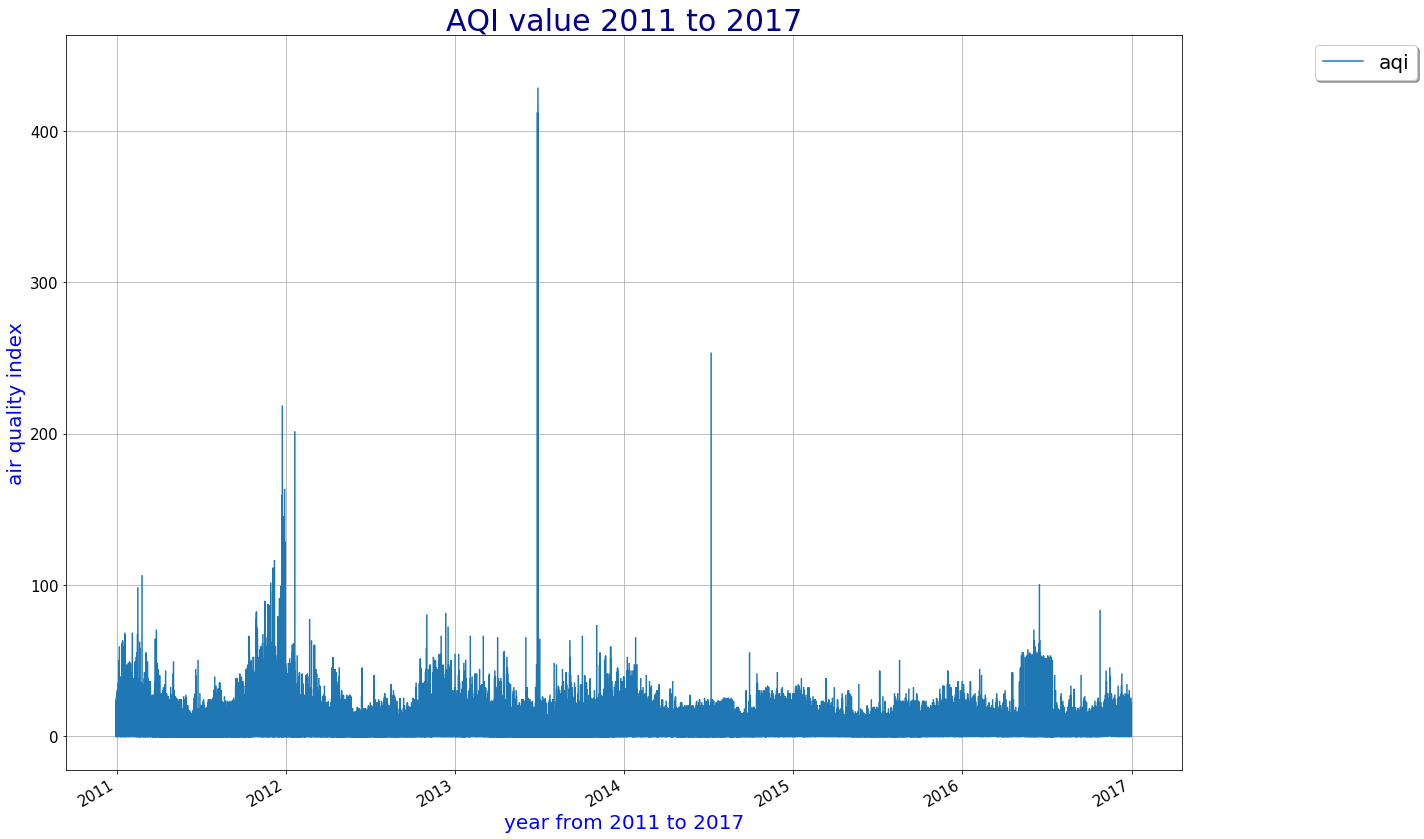

In [71]:
plt.rcParams['figure.figsize'] = (20,15)
df_co['aqi'].plot(grid= True)
plt.xlabel("year from 2011 to 2017", fontsize = 20, color = 'Blue')
plt.xticks(fontsize = 15)
plt.ylabel("air quality index", fontsize = 20, color = 'Blue')
plt.yticks(fontsize = 15)
ax.set_ylim(5, 35)
plt.title("AQI value 2011 to 2017", fontsize = 30, color = 'DarkBlue')
plt.legend(prop = {'size': 20}, frameon = True, fancybox = True, shadow = True, framealpha = 1, bbox_to_anchor=(1.22, 1))
plt.show()

In [26]:
def year_data(year):
    df = df_co[df_co.year == year ]
    return df

In [27]:
co_2011 = year_data(2011)
co_2011.head()

,state_code,county_code,date_local,arithmetic_mean,aqi,year,month,month_name
0,02,020,2011-03-08,1.320833,19,2011,3,Mar
2,02,020,2011-03-07,0.829167,15,2011,3,Mar
4,02,020,2011-03-12,1.137500,16,2011,3,Mar
5,02,020,2011-01-29,0.791667,20,2011,1,Jan
9,02,020,2011-11-26,0.737500,17,2011,11,Nov


In [28]:
co_2012 = year_data(2012)
co_2013 = year_data(2013)
co_2014 = year_data(2014)
co_2015 = year_data(2015)
co_2016 = year_data(2016)

ValueError: x and y must have same first dimension, but have shapes (1197682,) and (211762,)

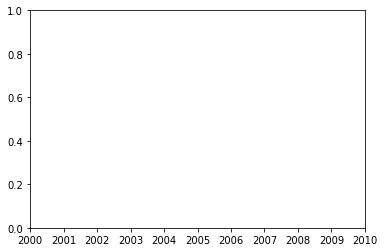

In [30]:
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%m')

x = df_co.date_local
y1 = co_2011.aqi
y2 = co_2012.aqi
y3 = co_2013.aqi
y4 = co_2014.aqi
y5 = co_2015.aqi
y6 = co_2016.aqi

f, ax = plt.subplots()
ax.plot(x, y1, 'yellow', label = '2011')
ax.plot(x, y2, 'red', label = '2012')
ax.plot(x, y3, 'blue', label = '2013')
ax.plot(x, y4, 'green', label = '2014')
ax.plot(x, y5, 'orange', label = '2015')
ax.plot(x, y6, 'purple', label = '2016')

ax.xaxis.set_major_formatter(myFmt)
ax.grid(True)

plt.rcParams['figure.figsize'] = (20,15)
df_co['aqi'].plot(grid= True)
plt.xlabel("year from 2011 to 2016", fontsize = 20, color = 'Blue')
plt.xticks(fontsize = 15)
plt.ylabel("air quality index", fontsize = 20, color = 'Blue')
plt.yticks(fontsize = 15)
ax.set_ylim(5, 35)
plt.title("AQI value 2011 to 2016", fontsize = 30, color = 'DarkBlue')
plt.legend(prop = {'size': 20}, frameon = True, fancybox = True, shadow = True, framealpha = 1, bbox_to_anchor=(1.22, 1))
plt.show()